<a href="https://colab.research.google.com/github/jfink09/New-Trading-Projects/blob/main/change_in_industry_group_rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.2 MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21081 sha256=481a1b44e7134a43be0d51da4784f67efe0427c1ca171cb6fab2281c95ad473e
  Stored in directory: /root/.cache/pip/wheels/8a/5e/f2/b643523c676b55f300b6fc8bd7ca65a358a983d5ad91730a71
Successfully built mplcursors


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

     Order Symbol                      Name  Number of Stocks  Ind Group Rank  \
0      147  G1311     Oil&Gas-Royalty Trust                14               1   
1       71  G1320              Energy-Solar                22               2   
2       13  G6022           Banks-Southeast                75               3   
3      148  G4922  Oil&Gas-Transprt/Pipelne                53               4   
4      121  G8063    Medical-Biomed/Biotech               798               5   
..     ...    ...                       ...               ...             ...   
192     79  G6731     Finance-Mortgage REIT                39             193   
193     30  G3079        Chemicals-Plastics                11             194   
194     43  G3270    Computer Sftwr-Desktop                 7             195   
195     55  G3651  Consumer Prod-Electronic                14             196   
196    154  G1094      Retail-Consumer Elec                 6             197   

     Ind Grp Rnk Last Week 

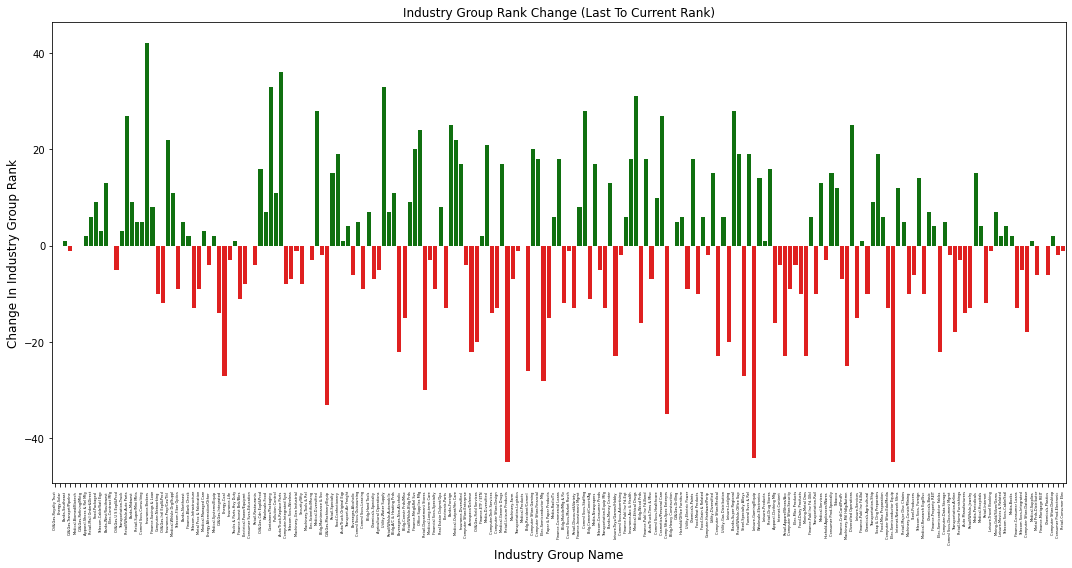

In [ ]:
csvFile = pd.read_csv('197 Industry Groups (7).csv')

lastweek_rank = csvFile['Ind Grp Rnk Last Week']
thisweek_rank = csvFile['Ind Group Rank']

new_rank = lastweek_rank - thisweek_rank

new_rank.columns =['Ind Group', 'Change']

csvFile = pd.DataFrame(csvFile)
csvFile['Change'] = new_rank
print(csvFile)

name = csvFile['Name']
change = csvFile['Change']

fig = plt.figure(figsize= (15,8))
color = ['r' if change<0 else 'g' for change in change]
ax = sns.barplot(x=name, y=change, palette=color)
plt.xticks(rotation=90)
_, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=3.5)
ax.xaxis.set_tick_params(labelsize=3.5)
plt.title("Industry Group Rank Change (Last To Current Rank)",size=12)
plt.xlabel("Industry Group Name",size=12)
plt.ylabel("Change In Industry Group Rank",size=12)

mplcursors.cursor(hover=True)

fig.set_tight_layout(True)
plt.show()